[*********************100%%**********************]  1 of 1 completed


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


[*********************100%%**********************]  1 of 1 completed


                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2022-09-06   2022-09-06
End Period                 2023-08-21   2023-08-21
Risk-Free Rate             0.0%         0.0%
Time in Market             69.0%        23.0%

Cumulative Return          12.43%       -10.0%
CAGR﹪                     8.83%        -7.32%

Sharpe                     0.63         -2.53
Prob. Sharpe Ratio         77.2%        0.67%
Smart Sharpe               0.63         -2.52
Sortino                    0.96         -3.45
Smart Sortino              0.96         -3.44
Sortino/√2                 0.68         -2.44
Smart Sortino/√2           0.68         -2.43
Omega                      0.41         0.41

Max Drawdown               -13.24%      -10.26%
Longest DD Days            142          328
Volatility (ann.)          15.29%       2.98%
R^2                        0.0          0.0
Information Ratio          -0.07        -0.07
Calmar          

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-09-28,2023-08-17,2023-08-21,328,-10.263842,-10.213872
2,2022-09-07,2022-09-20,2022-09-25,19,-0.860258,-0.680204


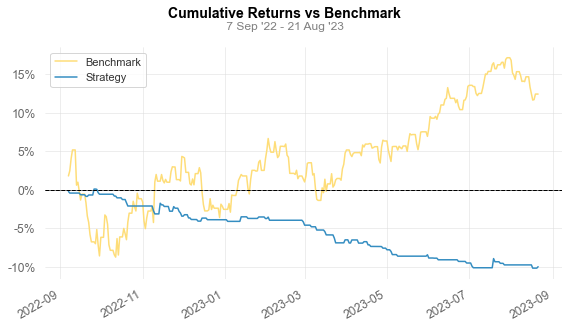

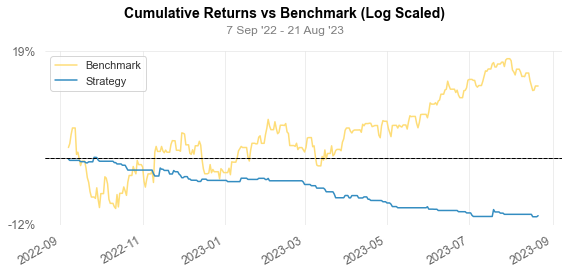

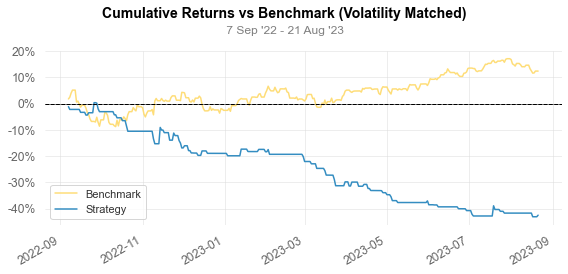

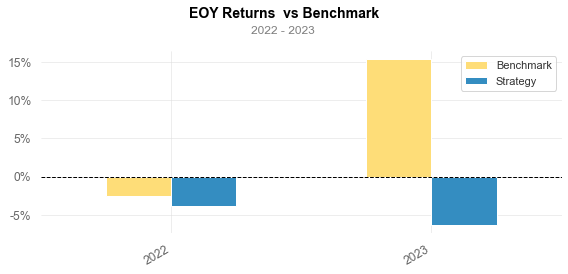

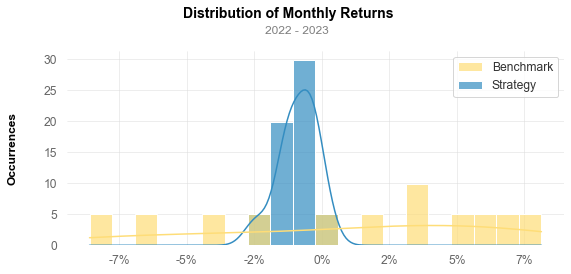

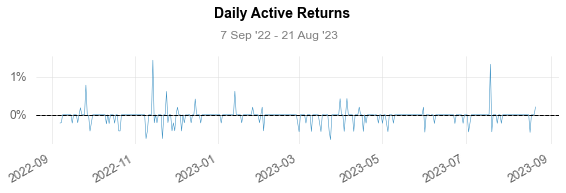

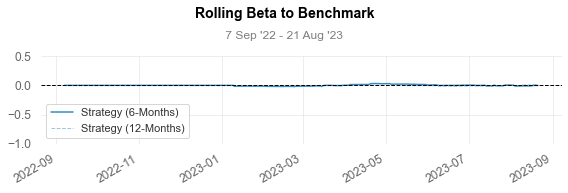

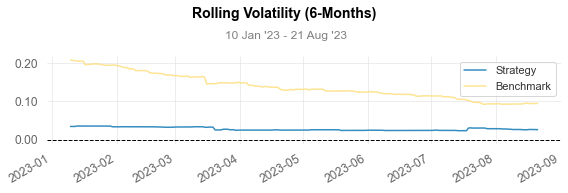

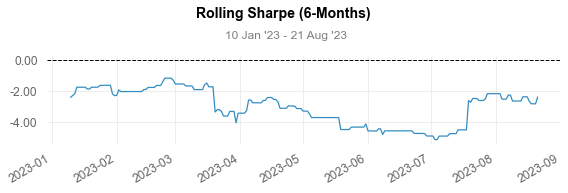

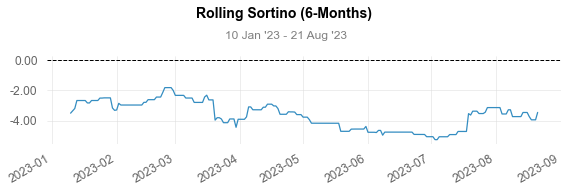

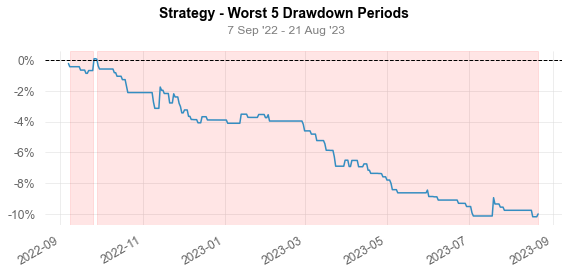

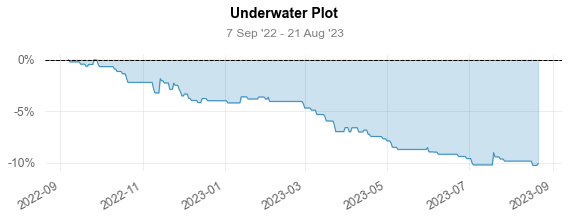

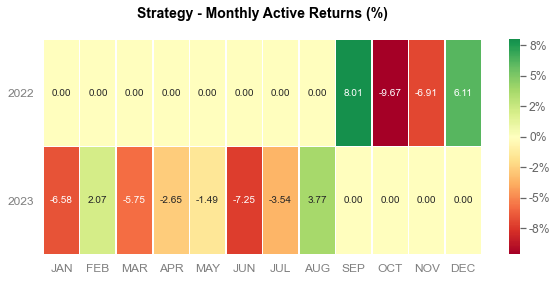

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


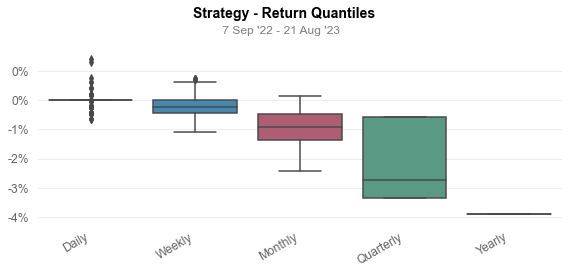

In [9]:
#%matplotlib inline
import quantstats as qs
import pandas as pd
import json
import os

def get_most_recent_file(folder_path, specific_string):
    matching_files = []
    
    # List all files in the folder
    files = os.listdir(folder_path)
    
    # Filter files that contain the specific string
    for file in files:
        if specific_string in file:
            matching_files.append(file)
    
    # If no matching files were found, return None
    if not matching_files:
        return None
    
    # Get the most recently modified file
    most_recent_file = max(matching_files, key=lambda f: os.path.getmtime(os.path.join(folder_path, f)))
    
    return most_recent_file

# Specify the folder path and the specific string
folder_path = './smart_trader_output/'
specific_string = 'returns'

# Get the most recently modified file name containing the specific string
most_recent_file = get_most_recent_file(folder_path, specific_string)

# extend pandas functionality with metrics, etc.
qs.extend_pandas()

#print(type(returns))
#stock = read_json_to_series('trades_20230911_134411_backtest_EURUSD_returns.json')
file_name =f'{folder_path}/{most_recent_file}'

# Read JSON data from the file
with open(file_name, 'r') as file:
    json_data = file.read()

# Parse the JSON data
data_dict = json.loads(json_data)

# Convert keys (timestamps) to datetime objects
datetime_index = pd.to_datetime(list(data_dict.keys()), unit='ms', utc=False)

# Convert values to float and create a Pandas Series
data_series = pd.Series(list(data_dict.values()), index=datetime_index, name="Date", dtype='float64')
returns = data_series

# Generate reports
qs.reports.html(returns, "SPY", output=f'{folder_path}/{most_recent_file}_report.html')
qs.reports.full(returns, "SPY")